<a href="https://colab.research.google.com/github/JohnMommers/X-GraphConv-y-One-value-Example-HILIC/blob/main/X_GraphConv_y_One_value_Example_HILIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TEMPLATE: example HILIC DATA (own data from Excel file)  
Data from: https://pubs.acs.org/doi/10.1021/acs.analchem.9b05765  
Publication: Anal. Chem. 2020, 92, 11, 7515–7522  

X=  GraphConv (featurized from smiles) 
y=  1 value: retention time   
MODEL = GraphConvModel / 'regression'

In [3]:
# install
!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
conda_installer.install()
!/root/miniconda/bin/conda info -e

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3490  100  3490    0     0  19281      0 --:--:-- --:--:-- --:--:-- 19281


all packages are already installed


# conda environments:
#
base                  *  /root/miniconda



In [4]:
!pip install --pre deepchem

     |████████████████████████████████| 532kB 4.9MB/s 


In [5]:
import deepchem as dc
dc.__version__

'2.5.0.dev'

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# predicting solubility of small molecules given their chemical formulas
# Delaney solubility data set

USING OWN DATASET

In [187]:
import pandas as pd
import numpy as np

In [188]:
raw_data_excel = pd.ExcelFile('/content/drive/MyDrive/HILLIC/Hillic_Dataset.xlsx')

# second sheet only
raw_data = raw_data_excel.parse(raw_data_excel.sheet_names[0])
raw_data.head(50)

,NAME,SMILES,RETENTION TIME
0,"(2-oxo-2,3-dihydro-1H-indol-3-yl)acetic acid",C1=CC=C2C(=C1)C(C(=O)N2)CC(=O)O,2.019083
1,"1,1-Dimethyl-4-phenylpiperazinium",CC1C(NC(CN1)C2=CC=CC=C2)C,2.607950
2,"1,2-Cyclohexanediol",C1CCC(C(C1)O)O,4.876550
3,"1,2-Cyclohexanedione",C1CCC(=O)C(=O)C1,5.772267
4,"1,3,7-Trimethyluric acid",CN1C2=C(NC1=O)N(C(=O)N(C2=O)C)C,1.827733
5,"1,3 Cyclohexanedione",C1CC(=O)CC(=O)C1,1.473133
6,"1,4-Cyclohexanedicarboxylic acid",C1CC(CCC1C(=O)O)C(=O)O,1.560217
7,"1,4-Cyclohexanedione",C1CC(=O)CCC1=O,1.151700
8,"1,7-Dimethyluric acid",CN1C2=C(NC1=O)NC(=O)N(C2=O)C,4.090533
9,1-Acetylimidazole,CC(=O)N1C=CN=C1,1.368133


In [189]:
X = raw_data['SMILES'] 
y = raw_data['RETENTION TIME']   

# NumpyDataset (for small datasets)
#dataset = dc.data.NumpyDataset(X,y)

# DiskDataset (for large datasets) 
dataset = dc.data.DiskDataset.from_numpy(X,y)

In [190]:
# featurizing
  
#featurizer = dc.feat.CircularFingerprint(radius=1, size=2048)
featurizer = dc.feat.ConvMolFeaturizer( )
#featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
features = featurizer.featurize(dataset.X)
dataset = dc.data.NumpyDataset(X=features, y=np.array(dataset.y))
dataset

<NumpyDataset X.shape: (880,), y.shape: (880,), w.shape: (880,), ids: [0 1 2 ... 877 878 879], task_names: [0]>

In [191]:
# EXAMPLE: RANDOM STRATIFIED SPLITTER: FOR VERY UMBALANCED DATA; IT DIVIDES THE POS AND NEG SAMPLES EVENLY
# DO NOT USE FOR SMALL OR IMBALANCED DATA
# MANY OTHER SPLITTERS ARE AVAILABLE !!!

splitter = dc.splits.RandomStratifiedSplitter()
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(  
    dataset=dataset, frac_train=0.6, frac_valid=0.2, frac_test=0.2
)

In [95]:
# load data 
#train_dataset, valid_dataset, test_dataset = datasets
# get 3 datasets: train, valid and test


In [192]:
# Create the model: graph convolutional
model = dc.models.GraphConvModel(n_tasks=1, mode='regression', dropout=0.2)

In [193]:
# Train the model
model.fit(train_dataset, nb_epoch=100)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:437: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_7/graph_pool_15/Reshape_14:0", shape=(447,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_7/graph_pool_15/Reshape_13:0", shape=(447, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_7/graph_pool_15/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:437: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_7/graph_pool_15/Reshape_17:0", shape=(1944,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_7/graph_poo

1.1091433715820314

In [194]:
# Evaluate model: Pearson correlation (also called r^2)
# perfect correlation is 1; no correlation is 0
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print("Training set score:", model.evaluate(train_dataset, [metric], transformers))
print("Test set score:", model.evaluate(test_dataset, [metric], transformers))

Training set score: {'pearson_r2_score': 0.9008766558156818}
Test set score: {'pearson_r2_score': 0.5996966531355992}


In [205]:
import seaborn as sns
pred = model.predict(test_dataset)
real = test_dataset.y

In [ ]:
d = {'pred':pred[:,0].tolist(), 'real':real.tolist()}
df = pd.DataFrame(data=d)
df.head(50)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


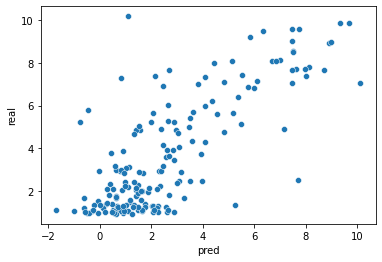

In [222]:
sns.scatterplot(df['pred'], df['real'])